## Prepare data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
authors = pd.read_csv("../data/external/general_recs/authors.csv", index_col=0)
authors.drop(columns="full_name", inplace=True)
submissions = pd.read_csv("../data/external/general_recs/cf-cpp-submissions-wo-code.csv", index_col=0)

In [3]:
def str2list(x):
    return x.strip("[]").replace("'", "").split(", ")


problems = pd.read_csv("../data/external/general_recs/final_df.csv", index_col=0,
                       converters={"tags": str2list, "tag_ids": str2list})

### Problems

In [4]:
problems.head()

,contest_id,index,problem_url,level_0,name,points,tags,tag_ids,rating
0,325,A,/contest/325/problem/A,7149.0,Квадрат и прямоугольники,500.0,[implementation],[23],1500.0
1,325,B,/contest/325/problem/B,7148.0,Стадион и игры,1000.0,"[binary search, math]","[3, 25]",1800.0
2,325,C,/contest/325/problem/C,7147.0,Монстры и бриллианты,2000.0,"[dfs and similar, graphs, shortest paths]","[10, 20, 31]",2600.0
3,325,D,/contest/325/problem/D,7146.0,Царство и государство,2000.0,[dsu],[13],2900.0
4,325,E,/contest/325/problem/E,7145.0,Тропинки и полянки,2500.0,"[combinatorics, dfs and similar, dsu, graphs, ...","[7, 10, 13, 20, 21]",2800.0


In [6]:
problems.rating.info()

<class 'pandas.core.series.Series'>
Index: 10107 entries, 0 to 10106
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
9783 non-null   float64
dtypes: float64(1)
memory usage: 157.9 KB


In [ ]:
problems.rating.hist(bins=[800, 1200, 1600, 1900, 2200, 2500, 2900, 3500])

In [8]:
problems["filled_rating"] = problems.apply(lambda row: row.rating if not row.rating != row.rating else problems[
    problems.rating.notna() & (problems["index"].str.slice(stop=1) == row["index"][:1])].rating.median(), axis=1)

In [12]:
problems_compact = problems[["problem_url", "filled_rating"]]

problems_compact.head()

,problem_url,filled_rating
0,/contest/325/problem/A,1500.0
1,/contest/325/problem/B,1800.0
2,/contest/325/problem/C,2600.0
3,/contest/325/problem/D,2900.0
4,/contest/325/problem/E,2800.0


<Axes: >

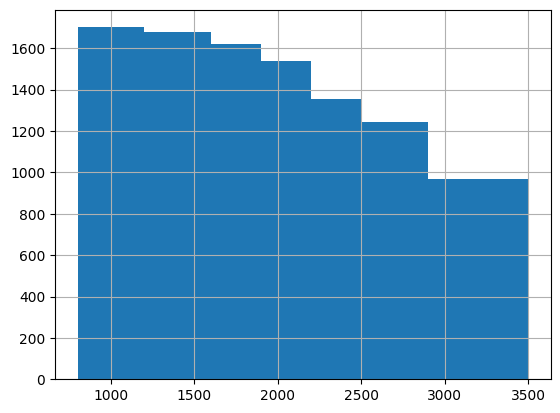

In [13]:
problems.filled_rating.hist(bins=[800, 1200, 1600, 1900, 2200, 2500, 2900, 3500])

In [14]:
problems["rating_labels"] = pd.cut(problems.filled_rating, bins=[799, 1199, 1599, 1899, 2199, 2499, 2899, 3501],
                                   labels=["newbie", "student", "expert", "master", "international master",
                                           "grandmaster", "legendary grandmaster"])

In [15]:
problem_features = list(problems.rating_labels.unique())

In [16]:
problem_features.remove(np.nan)

problem_features

['student',
 'expert',
 'grandmaster',
 'legendary grandmaster',
 'newbie',
 'master',
 'international master']

In [17]:
tags = set()

for problem_tags in tqdm(problems.tags):
    for tag in problem_tags:
        tags.add(tag)

100%|██████████| 10107/10107 [00:00<00:00, 640892.44it/s]


In [18]:
tags

{'',
 '*special',
 '2-sat',
 'binary search',
 'bitmasks',
 'brute force',
 'chinese remainder theorem',
 'combinatorics',
 'constructive algorithms',
 'data structures',
 'dfs and similar',
 'divide and conquer',
 'dp',
 'dsu',
 'expression parsing',
 'fft',
 'flows',
 'games',
 'geometry',
 'graph matchings',
 'graphs',
 'greedy',
 'hashing',
 'implementation',
 'interactive',
 'math',
 'matrices',
 'meet-in-the-middle',
 'number theory',
 'probabilities',
 'schedules',
 'shortest paths',
 'sortings',
 'string suffix structures',
 'strings',
 'ternary search',
 'trees',
 'two pointers'}

In [19]:
problem_features.extend(list(tags))

In [20]:
problem_urls = problems.problem_url.unique()

In [21]:
problem_urls

array(['/contest/325/problem/A', '/contest/325/problem/B',
       '/contest/325/problem/C', ..., '/contest/1814/problem/D',
       '/contest/1814/problem/E', '/contest/1814/problem/F'], dtype=object)

In [22]:
problem_urls = set(problem_urls)

In [23]:
problem_urls = problem_urls.union(set(submissions.problem_url.unique()))

In [24]:
problem_urls = list(problem_urls)

### Authors

In [25]:
authors.head()

,author,author_url,rating,rating_text,city,country,organization,contribution,friend_of,rating_max,rating_max_text,registered
1,anubhav360,/profile/anubhav360,1199.0,newbie,NaN,NaN,NaN,0.0,0.0,1393.0,pupil,Aug/22/2019 15:09
2,little_waxberry,/profile/little_waxberry,2186.0,master,Nanjing,China,Nanjing Foreign Language School,0.0,191.0,2186.0,master,Mar/20/2017 02:10
3,saurabhnewatiya,/profile/saurabhnewatiya,1259.0,pupil,Kanpur,India,"Jaypee Institute of Information Technology,Noida",0.0,34.0,1406.0,specialist,Aug/18/2018 17:31
4,mp13,/profile/mp13,929.0,newbie,Mumbai,India,Dwarkadas J. Sanghvi College of Engineering,0.0,1.0,1362.0,pupil,Nov/18/2019 13:42
5,sachi1325,/profile/sachi1325,1417.0,specialist,NaN,NaN,NaN,0.0,2.0,1495.0,specialist,Sep/24/2010 13:48


In [26]:
author_features = list(authors.rating_text.unique()) + list(authors.rating_max_text.unique())

In [27]:
author_features = list(set(author_features))
author_features.remove(np.nan)
author_features

['international grandmaster',
 'newbie',
 'grandmaster',
 'unrated',
 'expert',
 'headquarters',
 'specialist',
 'candidate master',
 'legendary grandmaster',
 'pupil',
 'master',
 'international master']

In [28]:
author_urls = set(authors.author_url.unique()).union(submissions.author_url.unique())

In [29]:
author_urls = list(author_urls)

In [30]:
authors_compact = authors[["author_url", "rating"]]

authors_compact.head()

,author_url,rating
1,/profile/anubhav360,1199.0
2,/profile/little_waxberry,2186.0
3,/profile/saurabhnewatiya,1259.0
4,/profile/mp13,929.0
5,/profile/sachi1325,1417.0


## Make the dataset

In [31]:
from lightfm.data import Dataset

In [32]:
ds = Dataset()

In [33]:
ds.fit(users=author_urls, items=problem_urls, user_features=author_features, item_features=problem_features)

In [34]:
for row in submissions[["author_url", "problem_url"]].values[:10]:
    print((row[0], row[1]))

('/profile/PinkieDashForever', '/contest/127/problem/A')
('/profile/PinkieDashForever', '/contest/127/problem/B')
('/profile/PinkieDashForever', '/contest/127/problem/C')
('/profile/PinkieDashForever', '/contest/127/problem/D')
('/profile/PinkieDashForever', '/contest/127/problem/E')
('/profile/cjtoribio', '/contest/127/problem/A')
('/profile/cjtoribio', '/contest/127/problem/B')
('/profile/cjtoribio', '/contest/127/problem/C')
('/profile/cjtoribio', '/contest/127/problem/D')
('/profile/cjtoribio', '/contest/127/problem/E')


## Build the dataset

In [35]:
submissions = pd.merge(submissions, authors_compact, how='left', on="author_url")

In [36]:
submissions = pd.merge(submissions, problems_compact, how='left', on="problem_url")

In [38]:
submissions.head()

,contest_id,submission_id,author,author_url,problem,problem_url,language,verdict,time,memory,sent,judged,rating,filled_rating
0,127,843764,Contestant:\nPinkieDashForever,/profile/PinkieDashForever,127A\r\n - 15,/contest/127/problem/A,MS C++,Accepted,30 ms,1360 KB,2011-11-09 21:05:56,2011-11-09 23:21:14,2152.0,900.0
1,127,844434,Contestant:\nPinkieDashForever,/profile/PinkieDashForever,127B\r\n - 27,/contest/127/problem/B,MS C++,Accepted,30 ms,1368 KB,2011-11-09 21:11:38,2011-11-09 23:26:49,2152.0,1000.0
2,127,850036,Contestant:\nPinkieDashForever,/profile/PinkieDashForever,127C\r\n - 38,/contest/127/problem/C,MS C++,Accepted,80 ms,1368 KB,2011-11-09 22:31:46,2011-11-09 23:56:53,2152.0,1900.0
3,127,846279,Contestant:\nPinkieDashForever,/profile/PinkieDashForever,127D\r\n - 49,/contest/127/problem/D,MS C++,Accepted,60 ms,6252 KB,2011-11-09 21:31:17,2011-11-09 23:41:06,2152.0,1700.0
4,127,847897,Contestant:\nPinkieDashForever,/profile/PinkieDashForever,127E\r\n - 18,/contest/127/problem/E,MS C++,Accepted,130 ms,17132 KB,2011-11-09 21:56:21,2011-11-09 23:49:30,2152.0,2000.0


In [40]:
print(submissions.filled_rating.info())

<class 'pandas.core.series.Series'>
RangeIndex: 9086946 entries, 0 to 9086945
Series name: filled_rating
Non-Null Count    Dtype  
--------------    -----  
8983611 non-null  float64
dtypes: float64(1)
memory usage: 69.3 MB
None


In [46]:
(interactions, weights) = ds.build_interactions(
    ((row[0], row[1]) for row in submissions[["author_url", "problem_url", "rating", "filled_rating"]].values if row[2] <= row[3]))

In [47]:
print(repr(interactions))

<359036x10213 sparse matrix of type '<class 'numpy.int32'>'
	with 1065455 stored elements in COOrdinate format>


In [30]:
# print(repr(interactions)) -- old

<359036x10213 sparse matrix of type '<class 'numpy.int32'>'
	with 9086946 stored elements in COOrdinate format>


In [48]:
for row in problems[["problem_url", "rating_labels", "tags"]].values[:5]:
    print((row[0], [row[1]] + row[2]))

('/contest/325/problem/A', ['student', 'implementation'])
('/contest/325/problem/B', ['expert', 'binary search', 'math'])
('/contest/325/problem/C', ['grandmaster', 'dfs and similar', 'graphs', 'shortest paths'])
('/contest/325/problem/D', ['legendary grandmaster', 'dsu'])
('/contest/325/problem/E', ['grandmaster', 'combinatorics', 'dfs and similar', 'dsu', 'graphs', 'greedy'])


In [49]:
item_features = ds.build_item_features(((row[0], [row[1]] + row[2] if row[1] == row[1] else row[2]) for row in
                                        problems[["problem_url", "rating_labels", "tags"]].values))

In [50]:
print(repr(item_features))

<10213x10258 sparse matrix of type '<class 'numpy.float32'>'
	with 46738 stored elements in Compressed Sparse Row format>


In [51]:
for row in authors[["author_url", "rating_text", "rating_max_text"]][authors.author_url.notna()].values[:5]:
    print((row[0], [row[1], row[2]]))

('/profile/anubhav360', ['newbie', 'pupil'])
('/profile/little_waxberry', ['master', 'master'])
('/profile/saurabhnewatiya', ['pupil', 'specialist'])
('/profile/mp13', ['newbie', 'pupil'])
('/profile/sachi1325', ['specialist', 'specialist'])


In [52]:
authors[authors.rating_max_text.isna() & authors.rating_text.notna()].head()

,author,author_url,rating,rating_text,city,country,organization,contribution,friend_of,rating_max,rating_max_text,registered
359738,vanwilder77,/profile/vanwilder77,NaN,unrated,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Apr/03/2012 20:41
359739,luciferajeet,/profile/luciferajeet,NaN,unrated,Ghaziabad,India,NaN,0.0,0.0,NaN,NaN,Aug/04/2015 21:26
359740,gjfjisuanjisiban,/profile/gjfjisuanjisiban,NaN,unrated,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Feb/13/2015 09:09
359741,VladTkach,/profile/VladTkach,NaN,unrated,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Apr/05/2019 19:42
359742,nestler.jang,/profile/nestler.jang,NaN,unrated,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Feb/25/2020 23:15


In [53]:
user_features = ds.build_user_features(((row[0], [row[1], row[2] if row[2] == row[2] else row[1]]) for row in
                                        authors[authors.author_url.notna()][
                                            ["author_url", "rating_text", "rating_max_text"]].values))

In [54]:
print(repr(user_features))

<359036x359048 sparse matrix of type '<class 'numpy.float32'>'
	with 826155 stored elements in Compressed Sparse Row format>


## Build the model

In [55]:
from lightfm import LightFM

model = LightFM(no_components=150, learning_rate=0.05, loss="warp", random_state=2023)
model.fit(interactions=interactions, user_features=user_features, item_features=item_features, sample_weight=weights,
          epochs=5, num_threads=8, verbose=True)

Epoch: 100%|██████████| 5/5 [00:22<00:00,  4.58s/it]


## Test model

In [77]:
res = model.predict(user_ids=ds.mapping()[0]["/profile/IRussianGamerI"], item_ids=np.arange(len(ds.mapping()[2])),
                    item_features=item_features, user_features=user_features)

In [78]:
print(res)

[-66.146164 -63.09422  -64.69383  ... -61.64777  -62.02909  -64.00947 ]


In [79]:
res.argmax()

3659

In [80]:
srt = res.argsort()

In [81]:
srt[-10:]

array([10153,  9206,  2938,  2444,  1678,   226,   187,  1155,  4169,
        3659])

In [82]:
inverted = {}

for key, value in ds._item_id_mapping.items():
    inverted[value] = key

In [83]:
for key in reversed(srt[-10:]):
    print(f"https://codeforces.com{inverted[key]}")

https://codeforces.com/contest/1331/problem/D
https://codeforces.com/contest/1549/problem/C
https://codeforces.com/contest/1538/problem/F
https://codeforces.com/contest/1473/problem/C
https://codeforces.com/contest/1616/problem/C
https://codeforces.com/contest/1400/problem/C
https://codeforces.com/contest/1391/problem/C
https://codeforces.com/contest/1552/problem/B
https://codeforces.com/contest/1368/problem/B
https://codeforces.com/contest/1632/problem/C


## GET recs

In [84]:
inverted = {}

for key, value in ds._item_id_mapping.items():
    inverted[value] = key

In [85]:
def get_ten_recs(username: str):
    res = model.predict(user_ids=ds.mapping()[0][f"/profile/{username}"], item_ids=np.arange(len(ds.mapping()[2])),
                        item_features=item_features, user_features=user_features)
    srt = res.argsort()
    for key in reversed(srt[-10:]):
        print(f"https://codeforces.com{inverted[key]}")

In [96]:
get_ten_recs("tourist")

https://codeforces.com/contest/1161/problem/E
https://codeforces.com/contest/1091/problem/H
https://codeforces.com/contest/1428/problem/G1
https://codeforces.com/contest/1329/problem/D
https://codeforces.com/contest/1610/problem/I
https://codeforces.com/contest/1280/problem/E
https://codeforces.com/contest/1428/problem/G2
https://codeforces.com/contest/1290/problem/E
https://codeforces.com/contest/1266/problem/F
https://codeforces.com/contest/455/problem/E


## Test another approach

In [116]:
new_authors = authors.set_index(authors.author_url)

In [119]:
print(submissions.author_url)

3264365    /profile/----
4621382    /profile/----
6616197    /profile/----
6616198    /profile/----
4621383    /profile/----
               ...      
4340946       /team/9994
6374327       /team/9995
705460        /team/9996
6373708       /team/9998
6373806       /team/9998
Name: author_url, Length: 9086946, dtype: object


In [118]:
submissions["author_rating"] = submissions.author_url.apply(
    lambda url: new_authors[url].rating if url in new_authors.index and new_authors[url].rating == new_authors[url].rating else 0)

KeyError: '/profile/----'

In [ ]:
(new_interactions, new_weights) = ds.build_interactions(
    ((pair[0], pair[1]) for pair in submissions[["author_url", "problem_url"]].values if))